In [1]:
# Subtask 

In [2]:
# Start by identifying the top 10 handsets used by the customers.

In [30]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
cleaned_data=pd.read_csv('cleaned_dataset_1_1.csv')
cleaned_data

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,9223372036854775807,2019-04-04 12:01:00,770,2019-04-25 14:35:00,662,1823652,208201448079117,33664962239,35521209507511,9.16456699548519E+015,...,15854611,2501332,8198936,9656251,278082303,14344150,171744450,8814393,36749741,308879636
1,9223372036854775807,2019-04-09 13:04:00,235,2019-04-25 08:15:00,606,1365104,208201909211140,33681854413,35794009006359,L77566A,...,20247395,19111729,18338413,17227132,608750074,1170709,526904238,15055145,53800391,653384965
2,9223372036854775807,2019-04-09 17:42:00,1,2019-04-25 11:58:00,652,1361762,208200314458056,33760627129,35281510359387,D42335A,...,19725661,14699576,17587794,6163408,229584621,395630,410692588,4215763,27883638,279807335
3,9223372036854775807,2019-04-10 00:31:00,486,2019-04-25 07:36:00,171,1321509,208201402342131,33750343200,35356610164913,T21824A,...,21388122,15146643,13994646,1097942,799538153,10849722,749039933,12797283,43324218,846028530
4,9223372036854775807,2019-04-12 20:10:00,565,2019-04-25 10:40:00,954,1089009,208201401415120,33699795932,35407009745539,D88865A,...,15259380,18962873,17124581,415218,527707248,3529801,550709500,13910322,38542814,569138589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7277825670196679680,2019-04-29 07:28:00,451,2019-04-30 06:02:00,214,81230,208202201200072,33650688697,35483109451938,D20434A,...,16191667,11763428,17883703,19678161,526609673,9197207,3264510,13487416,57628851,574175259
149997,7349883264234609664,2019-04-29 07:28:00,483,2019-04-30 10:41:00,187,97970,208201908153249,33663449963,35660508296467,D10223C,...,13877234,8288284,19350146,21293148,626893062,4735033,712180387,2457758,39135081,666648844
149998,9223372036854775807,2019-04-29 07:28:00,283,2019-04-30 10:46:00,810,98249,208201711161187,33621890103,35721209870907,T51102A,...,22660510,1855903,9963942,5065760,553539484,13394316,121100856,11314729,34912224,592786405
149999,9223372036854775807,2019-04-29 07:28:00,696,2019-04-30 10:40:00,327,97910,208202101098075,33619622058,86186204011457,L88342B,...,8817106,8305402,3322253,13172589,352536971,2529475,814713113,1406930,29626096,371895920


In [31]:
top_handsets = cleaned_data['Handset Type'].value_counts().head(10)
print("Top 10 Handsets:")
print(top_handsets)

Top 10 Handsets:
Handset Type
Huawei B528S-23A                20324
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: count, dtype: int64


In [32]:
# identify the top 3 handset manufacturers

In [33]:
handset_types = cleaned_data['Handset Type']
def extract_manufacturer(handset_type):
    if pd.isna(handset_type):
        return 'Unknown'
    else:
        parts = handset_type.split()
        if len(parts) > 1:
            return parts[0]  # Assuming first word is manufacturer
        else:
            return 'Unknown'
cleaned_data['Manufacturer'] = handset_types.apply(extract_manufacturer)
top_manufacturers = cleaned_data['Manufacturer'].value_counts().head(3)

print("Top 3 Handset Manufacturers:")
print(top_manufacturers)


Top 3 Handset Manufacturers:
Manufacturer
Apple      59565
Samsung    40839
Huawei     34995
Name: count, dtype: int64


In [34]:
 #identify the top 5 handsets per top 3 handset manufacturer

In [35]:
handset_types = cleaned_data['Handset Type']
def extract_manufacturer(handset_type):
    if pd.isna(handset_type):
        return 'Unknown'
    else:
        parts = handset_type.split()
        if len(parts) > 1:
            return parts[0] 
        else:
            return 'Unknown'
cleaned_data['Manufacturer'] = handset_types.apply(extract_manufacturer)
top_manufacturers =  cleaned_data['Manufacturer'].value_counts().head(3).index.tolist()

# Filter data for top 3 manufacturers
df_top_manufacturers = cleaned_data[cleaned_data['Manufacturer'].isin(top_manufacturers)]
top_handsets_per_manufacturer = {}
for manufacturer in top_manufacturers:
    manufacturer_data = df_top_manufacturers[df_top_manufacturers['Manufacturer'] == manufacturer]
    top_handsets = manufacturer_data['Handset Type'].value_counts().head(5)
    top_handsets_per_manufacturer[manufacturer] = top_handsets

# Print the top 5 handsets per top 3 manufacturers
for manufacturer, top_handsets in top_handsets_per_manufacturer.items():
    print(f"\nTop 5 Handsets for {manufacturer}:")
    print(top_handsets)



Top 5 Handsets for Apple:
Handset Type
Apple iPhone 6S (A1688)    9419
Apple iPhone 6 (A1586)     9023
Apple iPhone 7 (A1778)     6326
Apple iPhone Se (A1723)    5187
Apple iPhone 8 (A1905)     4993
Name: count, dtype: int64

Top 5 Handsets for Samsung:
Handset Type
Samsung Galaxy S8 (Sm-G950F)    4520
Samsung Galaxy A5 Sm-A520F      3724
Samsung Galaxy J5 (Sm-J530)     3696
Samsung Galaxy J3 (Sm-J330)     3484
Samsung Galaxy S7 (Sm-G930X)    3199
Name: count, dtype: int64

Top 5 Handsets for Huawei:
Handset Type
Huawei B528S-23A                  20324
Huawei E5180                       2079
Huawei P20 Lite Huawei Nova 3E     2021
Huawei P20                         1480
Huawei Y6 2018                      997
Name: count, dtype: int64


In [36]:
# Task 1.1 -'
''' Your employer wants to have an overview of the users’ behavior on those applications.   
	•	Aggregate per user the following information in the column  
	◦	number of xDR sessions
	◦	Session duration
	◦	the total download (DL) and upload (UL) data
	◦	the total data volume (in Bytes) during this session for each application'''

' Your employer wants to have an overview of the users’ behavior on those applications.   \n\t•\tAggregate per user the following information in the column  \n\t◦\tnumber of xDR sessions\n\t◦\tSession duration\n\t◦\tthe total download (DL) and upload (UL) data\n\t◦\tthe total data volume (in Bytes) during this session for each application'

In [37]:
#Variable transformations

# Calculate total duration per user
total_duration_per_user = cleaned_data.groupby('MSISDN/Number')['Dur. (ms)'].sum().reset_index()

# Calculate deciles based on total duration
total_duration_per_user['duration_decile'] = pd.qcut(total_duration_per_user['Dur. (ms)'], q=[0, 0.2, 0.4, 0.6, 0.8, 1], labels=False, duplicates='drop')

# Calculate total data (DL+UL) per user
total_data_per_user = cleaned_data.groupby('MSISDN/Number')[['Total UL (Bytes)', 'Total DL (Bytes)']].sum().reset_index()

# Merge the two DataFrames on 'MSISDN/Number'
merged_df = pd.merge(total_duration_per_user, total_data_per_user, on='MSISDN/Number')

# Calculate total data (DL+UL) per decile class
total_data_per_decile = merged_df.groupby('duration_decile')[['Total UL (Bytes)', 'Total DL (Bytes)']].sum().reset_index()

# Display the result
print(total_data_per_decile)

   duration_decile  Total UL (Bytes)  Total DL (Bytes)
0                0      954742960658    10593944089174
1                1     1044427958832    11526214555358
2                2      960517754099    10609465205111
3                3     1157958373734    12816753681013
4                4     2050575017699    22650591624619


In [38]:
# Task 1.2

In [39]:
# Conduct a Non-Graphical Univariate Analysis by computing dispersion parameters for each quantitative variable and provide useful interpretation. 

In [40]:
import pandas as pd
import numpy as np
quantitative_columns = cleaned_data.select_dtypes(include=[np.number]).columns

# Calculate dispersion parameters
dispersion_parameters = {}
for col in quantitative_columns:
    values = cleaned_data[col]
    range_val = np.ptp(values)  # Peak to Peak (Max - Min)
    q75, q25 = np.percentile(values, [75 ,25])
    iqr = q75 - q25
    std_dev = np.std(values)
    variance = np.var(values)
    mad = np.mean(np.abs(values - np.mean(values)))
    
    dispersion_parameters[col] = {
        'Range': range_val,
        'IQR': iqr,
        'Standard Deviation': std_dev,
        'Variance': variance,
        'Mean Absolute Deviation': mad
    }

# Print dispersion parameters
for col, params in dispersion_parameters.items():
    print(f"Column: {col}")
    for param, value in params.items():
        print(f"{param}: {value}")
    print("\n")


Column: Bearer Id
Range: 2305834518311245823
IQR: 1.8734887894068562e+18
Standard Deviation: 9.709725603562474e+17
Variance: 9.427877129647665e+35
Mean Absolute Deviation: 9.676246713793057e+17


Column: Start ms
Range: 999
IQR: 499.0
Standard Deviation: 288.60991017252763
Variance: 83295.68024979446
Mean Absolute Deviation: 249.8741029138334


Column: End ms
Range: 999
IQR: 499.0
Standard Deviation: 288.09573256325893
Variance: 82999.15112116083
Mean Absolute Deviation: 249.57153394481085


Column: Dur. (ms)
Range: 1852194
IQR: 74988.0
Standard Deviation: 81037.0812299928
Variance: 6567008534.276451
Mean Absolute Deviation: 52248.5924483588


Column: IMSI
Range: 10027194860177
IQR: 370342358.0
Standard Deviation: 21447153118.50362
Variance: 4.5998037688853955e+20
Mean Absolute Deviation: 622599670.2037599


Column: MSISDN/Number
Range: 882363507487729
IQR: 33222169.0
Standard Deviation: 2438723141415.5938
Variance: 5.947370560475942e+24
Mean Absolute Deviation: 16299471575.633902


Co

In [41]:
# Conduct a Graphical Univariate Analysis by identifying the most suitable plotting options for each variable and interpreting your findings.

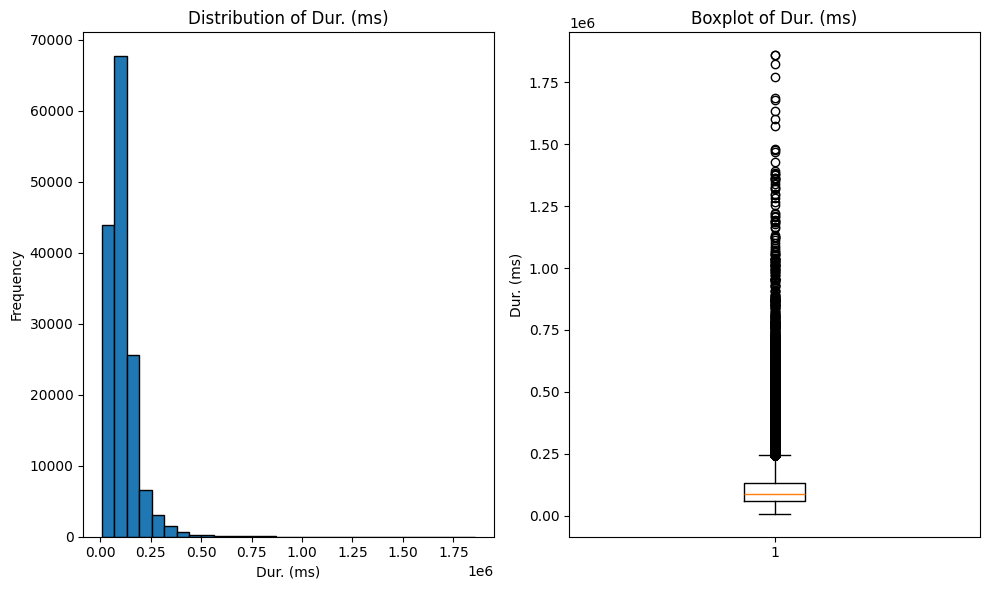

In [42]:
# Example for 'Dur. (ms)' numerical variable
plt.figure(figsize=(10, 6))

# Histogram
plt.subplot(1, 2, 1)
plt.hist(cleaned_data['Dur. (ms)'], bins=30, edgecolor='black')
plt.title('Distribution of Dur. (ms)')
plt.xlabel('Dur. (ms)')
plt.ylabel('Frequency')

# Boxplot
plt.subplot(1, 2, 2)
plt.boxplot(cleaned_data['Dur. (ms)'])
plt.title('Boxplot of Dur. (ms)')
plt.ylabel('Dur. (ms)')

plt.tight_layout()
plt.show()


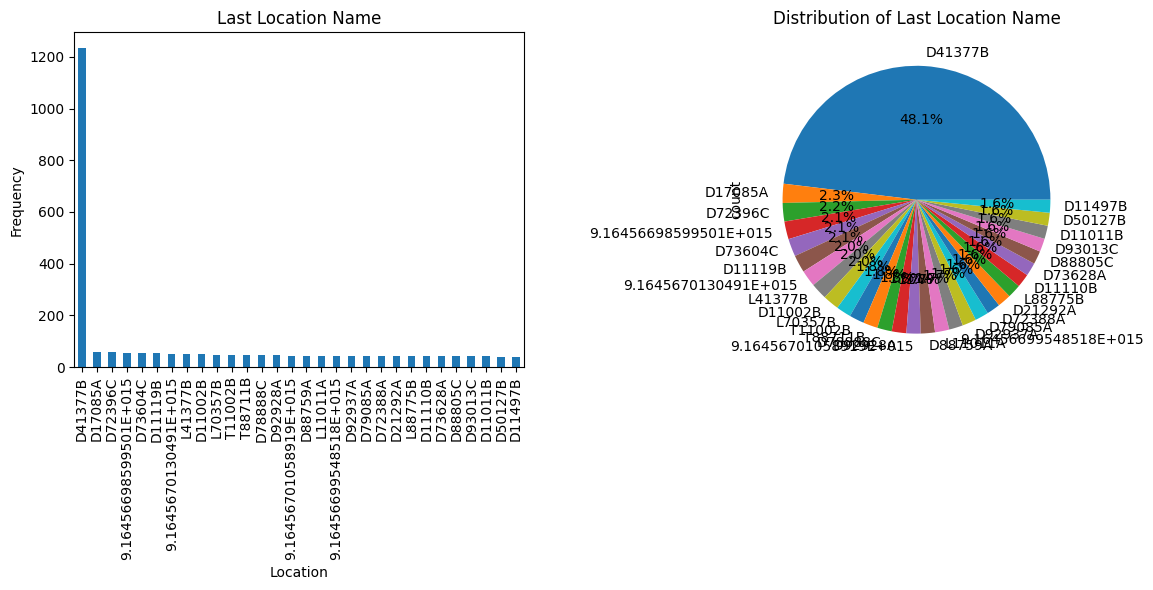

In [43]:
# Example for 'Last Location Name' categorical variable
plt.figure(figsize=(12, 6))

# Bar plot
plt.subplot(1, 2, 1)
cleaned_data['Last Location Name'].value_counts().head(30).plot(kind='bar')
plt.title('Last Location Name')
plt.xlabel('Location')
plt.ylabel('Frequency')

# Value counts
plt.subplot(1, 2, 2)
cleaned_data['Last Location Name'].value_counts().head(30).plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Last Location Name')

plt.tight_layout()
plt.show()


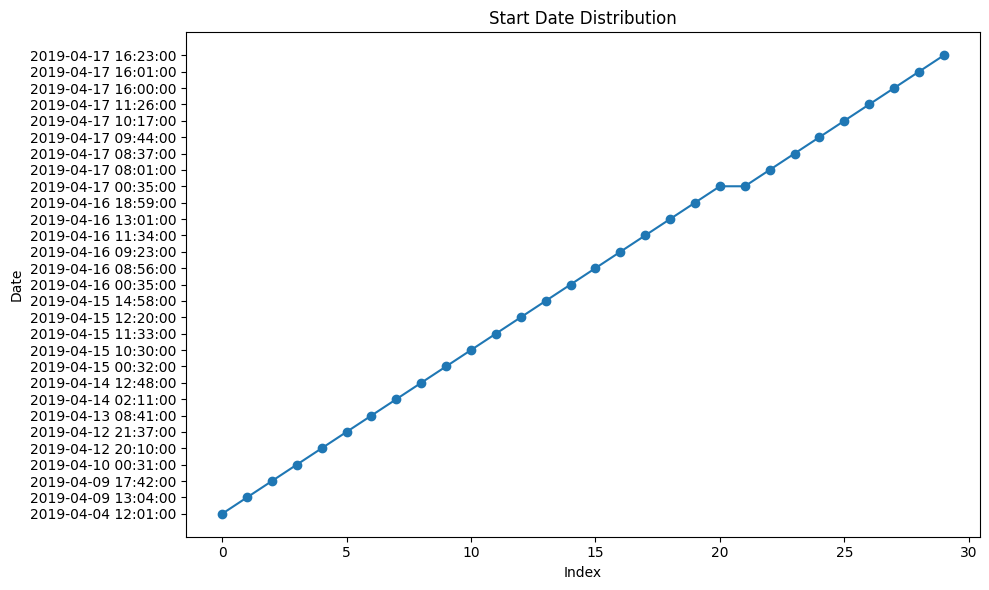

In [44]:
# Example for 'Start' datetime variable
plt.figure(figsize=(10, 6))

# Line plot or histogram of dates
plt.plot(cleaned_data['Start'].head(30), marker='o', linestyle='-')
plt.title('Start Date Distribution')
plt.xlabel('Index')
plt.ylabel('Date')

plt.tight_layout()
plt.show()


In [45]:
# Bivariate Analysis – explore the relationship between each application & the total DL+UL data using appropriate methods and interpret your findings.

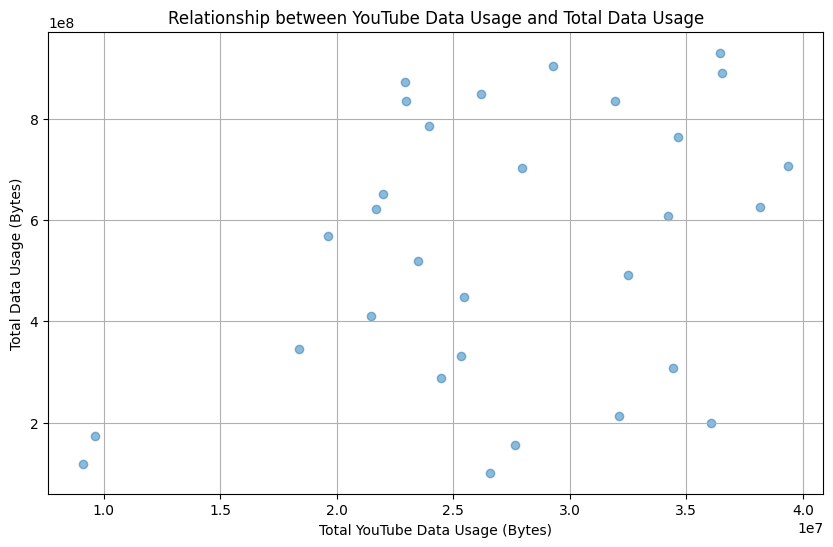

Pearson correlation coefficient for YouTube: 0.3866977112388267


In [46]:

cleaned_data['Total_Youtube'] = cleaned_data['Youtube DL (Bytes)'] + cleaned_data['Youtube UL (Bytes)']
cleaned_data['Total_Netflix'] = cleaned_data['Netflix DL (Bytes)'] + cleaned_data['Netflix UL (Bytes)']
cleaned_data['Total_Gaming'] = cleaned_data['Gaming DL (Bytes)'] + cleaned_data['Gaming UL (Bytes)']

# Scatter plot and correlation for YouTube
plt.figure(figsize=(10, 6))
plt.scatter(cleaned_data['Total_Youtube'].head(30), cleaned_data['Total UL (Bytes)'].head(30) + cleaned_data['Total DL (Bytes)'].head(30), alpha=0.5)
plt.title('Relationship between YouTube Data Usage and Total Data Usage')
plt.xlabel('Total YouTube Data Usage (Bytes)')
plt.ylabel('Total Data Usage (Bytes)')
plt.grid(True)
plt.show()

# Calculate Pearson correlation coefficient for YouTube
youtube_corr = cleaned_data[['Total_Youtube', 'Total UL (Bytes)', 'Total DL (Bytes)']].corr().iloc[0, 1]

print(f"Pearson correlation coefficient for YouTube: {youtube_corr}")

# Repeat similar steps for Netflix, Gaming, and other applications


In [47]:
# conclusion-No correlation (coefficient ≈ 0): Applications where usage does not significantly affect total data usage.


In [48]:
#Variable transformations

# Calculate total duration per user
total_duration_per_user = cleaned_data.groupby('MSISDN/Number')['Dur. (ms)'].sum().reset_index()

# Calculate deciles based on total duration
total_duration_per_user['duration_decile'] = pd.qcut(total_duration_per_user['Dur. (ms)'], q=[0, 0.2, 0.4, 0.6, 0.8, 1], labels=False, duplicates='drop')

# Calculate total data (DL+UL) per user
total_data_per_user = cleaned_data.groupby('MSISDN/Number')[['Total UL (Bytes)', 'Total DL (Bytes)']].sum().reset_index()

# Merge the two DataFrames on 'MSISDN/Number'
merged_df = pd.merge(total_duration_per_user, total_data_per_user, on='MSISDN/Number')

# Calculate total data (DL+UL) per decile class
total_data_per_decile = merged_df.groupby('duration_decile')[['Total UL (Bytes)', 'Total DL (Bytes)']].sum().reset_index()

# Display the result
print(total_data_per_decile)

   duration_decile  Total UL (Bytes)  Total DL (Bytes)
0                0      954742960658    10593944089174
1                1     1044427958832    11526214555358
2                2      960517754099    10609465205111
3                3     1157958373734    12816753681013
4                4     2050575017699    22650591624619


In [49]:
# Correlation Analysis – compute a correlation matrix for the following variables and interpret your findings: Social Media data, Google data, Email data, YouTube data, Netflix data, Gaming data, and Other data 

In [50]:
cleaned_data

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Manufacturer,Total_Youtube,Total_Netflix,Total_Gaming
0,9223372036854775807,2019-04-04 12:01:00,770,2019-04-25 14:35:00,662,1823652,208201448079117,33664962239,35521209507511,9.16456699548519E+015,...,278082303,14344150,171744450,8814393,36749741,308879636,Samsung,18355943,17855187,292426453
1,9223372036854775807,2019-04-09 13:04:00,235,2019-04-25 08:15:00,606,1365104,208201909211140,33681854413,35794009006359,L77566A,...,608750074,1170709,526904238,15055145,53800391,653384965,Samsung,39359124,35565545,609920783
2,9223372036854775807,2019-04-09 17:42:00,1,2019-04-25 11:58:00,652,1361762,208200314458056,33760627129,35281510359387,D42335A,...,229584621,395630,410692588,4215763,27883638,279807335,Samsung,34425237,23751202,229980251
3,9223372036854775807,2019-04-10 00:31:00,486,2019-04-25 07:36:00,171,1321509,208201402342131,33750343200,35356610164913,T21824A,...,799538153,10849722,749039933,12797283,43324218,846028530,Unknown,36534765,15092588,810387875
4,9223372036854775807,2019-04-12 20:10:00,565,2019-04-25 10:40:00,954,1089009,208201401415120,33699795932,35407009745539,D88865A,...,527707248,3529801,550709500,13910322,38542814,569138589,Samsung,34222253,17539799,531237049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7277825670196679680,2019-04-29 07:28:00,451,2019-04-30 06:02:00,214,81230,208202201200072,33650688697,35483109451938,D20434A,...,526609673,9197207,3264510,13487416,57628851,574175259,Apple,27955095,37561864,535806880
149997,7349883264234609664,2019-04-29 07:28:00,483,2019-04-30 10:41:00,187,97970,208201908153249,33663449963,35660508296467,D10223C,...,626893062,4735033,712180387,2457758,39135081,666648844,Apple,22165518,40643294,631628095
149998,9223372036854775807,2019-04-29 07:28:00,283,2019-04-30 10:46:00,810,98249,208201711161187,33621890103,35721209870907,T51102A,...,553539484,13394316,121100856,11314729,34912224,592786405,Apple,24516413,15029702,566933800
149999,9223372036854775807,2019-04-29 07:28:00,696,2019-04-30 10:40:00,327,97910,208202101098075,33619622058,86186204011457,L88342B,...,352536971,2529475,814713113,1406930,29626096,371895920,Huawei,17122508,16494842,355066446


                    Total_social_media  Total_Google  Total_Email  \
Total_social_media            1.000000     -0.001708     0.005217   
Total_Google                 -0.001708      1.000000     0.032979   
Total_Email                   0.005217      0.032979     1.000000   
Total_Youtube                 0.000548      0.002277     0.385000   
Total_Netflix                 0.001013     -0.001902     0.383853   
Total_Gaming                  0.001082     -0.000994     0.006340   
Total_Other                   0.006065     -0.001727     0.006206   

                    Total_Youtube  Total_Netflix  Total_Gaming  Total_Other  
Total_social_media       0.000548       0.001013      0.001082     0.006065  
Total_Google             0.002277      -0.001902     -0.000994    -0.001727  
Total_Email              0.385000       0.383853      0.006340     0.006206  
Total_Youtube            1.000000       0.002882     -0.002999     0.002969  
Total_Netflix            0.002882       1.000000     -0.0

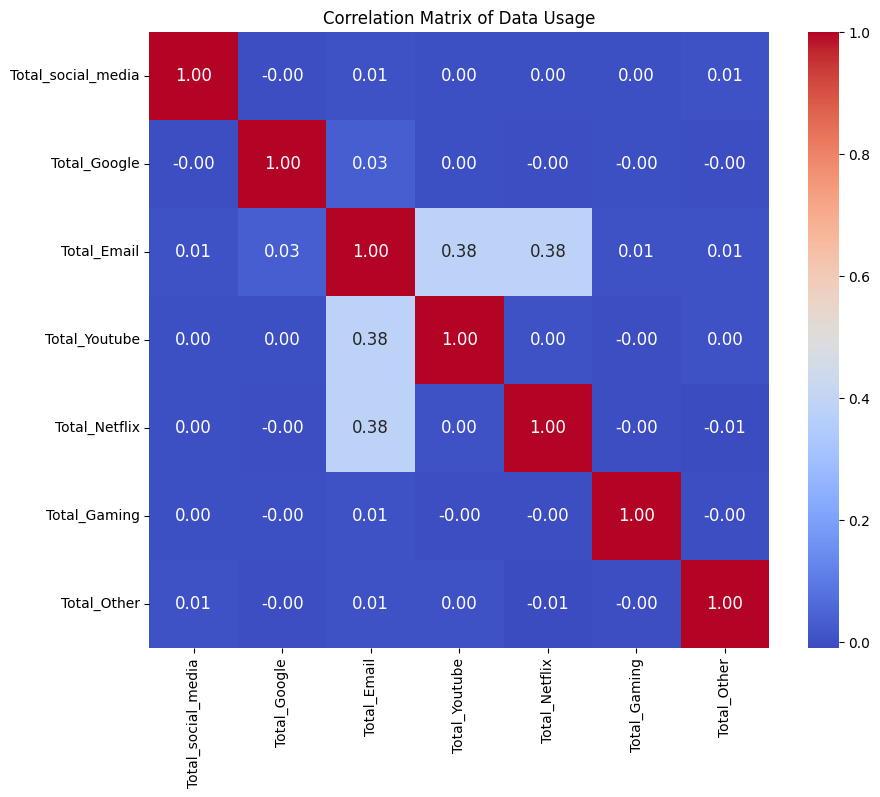

In [51]:
# Select relevant columns for correlation analysis
cleaned_data['Total_social_media']=cleaned_data['Social Media DL (Bytes)']+cleaned_data['Social Media UL (Bytes)']
cleaned_data['Total_Google']=cleaned_data['Google UL (Bytes)']+cleaned_data['Google DL (Bytes)']
cleaned_data['Total_Email']=cleaned_data['Email DL (Bytes)']+cleaned_data['Total UL (Bytes)']
cleaned_data['Total_Other']=cleaned_data['Other DL (Bytes)']+cleaned_data['Other UL (Bytes)']
data_columns = ['Total_social_media', 'Total_Google', 'Total_Email', 'Total_Youtube', 'Total_Netflix', 'Total_Gaming', 'Total_Other']
correlation_matrix = cleaned_data[data_columns].corr()
print(correlation_matrix)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 12})
plt.title('Correlation Matrix of Data Usage')
plt.show()


In [52]:
# Total_social_media has high correlation value as compared to other column values 

In [53]:
# Dimensionality Reduction 

In [54]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
cleaned_data.dropna(inplace=True)# Drop any rows missing values for simplicity
non_numeric_column=cleaned_data.select_dtypes(exclude=['number']).columns
cleaned_data_numeric=cleaned_data.drop(non_numeric_column,axis=1)
# Standardize the data
scaler=StandardScaler()
X_standardized=scaler.fit_transform(cleaned_data_numeric)
# Perform PCA
pca=PCA()
X_pca=pca.fit_transform(X_standardized)
# Explained variance ratio
explained_variance_ratio=pca.explained_variance_ratio_
cumulative_explained_variance=explained_variance_ratio.cumsum()
print(f"Explained variance ratio :'{explained_variance_ratio}'")
print(f"Cumulative expaled variance : '{cumulative_explained_variance} '")

Explained variance ratio :'[1.32056901e-01 5.99010064e-02 5.26242944e-02 5.17473278e-02
 4.31790797e-02 3.54270484e-02 3.51962220e-02 3.49880362e-02
 3.46843796e-02 3.07102989e-02 2.95902312e-02 2.79909142e-02
 2.76263480e-02 2.56704088e-02 2.45729359e-02 2.00495048e-02
 1.96707265e-02 1.84968383e-02 1.78069565e-02 1.77743633e-02
 1.75854373e-02 1.75572271e-02 1.75314015e-02 1.74330455e-02
 1.74113681e-02 1.73495872e-02 1.68278361e-02 1.63591909e-02
 1.54066988e-02 1.30455918e-02 1.27953874e-02 1.20981943e-02
 1.08163872e-02 9.32036514e-03 9.04729894e-03 8.34277664e-03
 6.70606742e-03 6.02545293e-03 5.02000825e-03 4.83560454e-03
 3.09547049e-03 2.70711742e-03 1.41613761e-03 1.11862542e-03
 2.89258655e-04 7.55584716e-05 1.90825192e-05 1.31443483e-13
 1.10655237e-17 9.18728930e-18 1.65475380e-18 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00]'
Cumulative expaled variance : '[0.1320569  0.19195791 0.2445822  0.29632953 0.33950861 0.37493566
 0.

In [55]:
# choose the number of components baseed on the plot or a desired thresold
# e.g, 95%cvariance 
num_components=3
# Retain the selected number of components
X_pca_selected=X_pca[:,:num_components]
# Interpretation of principal componets 
principal_components_df=pd.DataFrame(pca.components_,columns=cleaned_data_numeric.columns)
print("Principal Components Loading")
print(principal_components_df)

Principal Components Loading
       Bearer Id      Start ms        End ms  Dur. (ms)          IMSI  \
0   3.881231e-02  6.928058e-05  6.229121e-04  -0.056133  4.447275e-04   
1  -3.936207e-03 -7.015660e-04 -9.624799e-04  -0.002484 -3.317917e-04   
2   2.413759e-03 -3.891427e-03 -4.098946e-03  -0.009624  5.678764e-03   
3  -1.928339e-02 -1.046209e-03 -1.987542e-03   0.086400 -2.468847e-03   
4   1.896573e-02  2.873030e-03 -1.962339e-03   0.438240 -1.753577e-02   
5  -1.286356e-03 -1.411253e-03  1.225747e-03  -0.023533  8.722421e-03   
6   1.735044e-03  2.521049e-03 -4.829185e-03  -0.000522 -7.429468e-03   
7  -8.035994e-04  4.144252e-03  5.358108e-03  -0.013027 -1.781467e-03   
8  -2.187403e-03 -4.568906e-03  5.736320e-03   0.004363 -4.796157e-03   
9   5.488324e-02 -5.220188e-03 -1.143183e-02  -0.081707  1.697862e-02   
10  2.808237e-02 -3.152147e-03  1.703877e-03   0.440124 -8.776140e-02   
11  3.713013e-02 -6.179349e-03 -5.230147e-03   0.152163 -5.842430e-02   
12 -4.924853e-02 -3.62

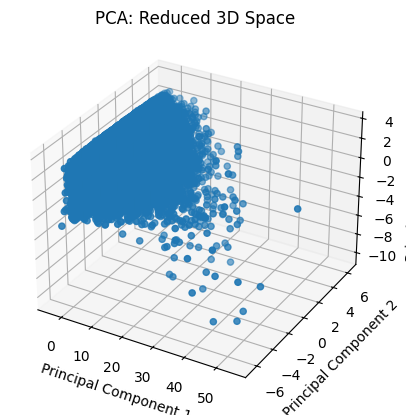

In [56]:
# Real-world interpretation of principal components
# Visualize in the reduced-dimensional space (for 2D or 3D)
if num_components == 2:
    plt.scatter(X_pca_selected[:, 0], X_pca_selected[:, 1], marker='o')
    plt.title('PCA: Reduced 2D Space')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()
elif num_components == 3:
    from mpl_toolkits.mplot3d import Axes3D
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X_pca_selected[:, 0], X_pca_selected[:, 1], X_pca_selected[:, 2], marker='o')
    ax.set_title('PCA: Reduced 3D Space')
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.set_zlabel('Principal Component 3')
    plt.show()
    

In [57]:
cleaned_filename = 'cleaned_dataset_1.csv'
cleaned_data.to_csv(cleaned_filename, index=False)

print(f"Cleaned data saved to '{cleaned_filename}'")

Cleaned data saved to 'cleaned_dataset_1.csv'
